In [1]:
import math
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
a = 3
model = signal.lti([0, 1], [a, 1]) 


/home/dima/.local/lib/python3.10/site-packages/scipy/signal/_filter_design.py:1709: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


In [3]:
freq = 0.1
Amps = [0.001, 0.01, 0.1, 1.0]
T = np.linspace(0, 200.0/freq, 10001)

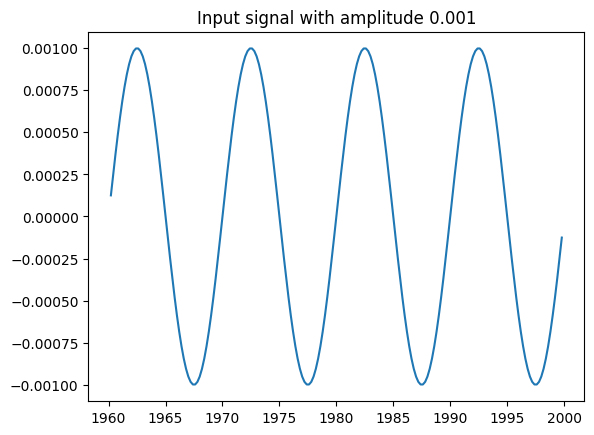

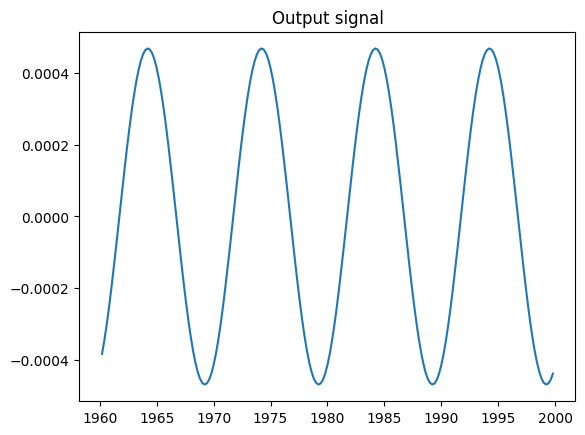

Input amlplitude: 0.001;	output amplitude: 0.0004679810570325471
oriental point: 1980.2	-0.00038270141346600096


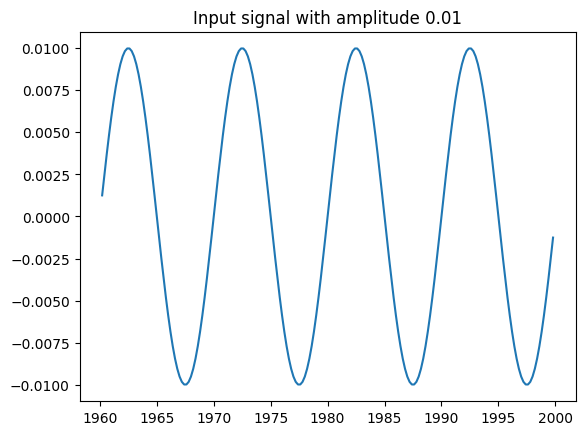

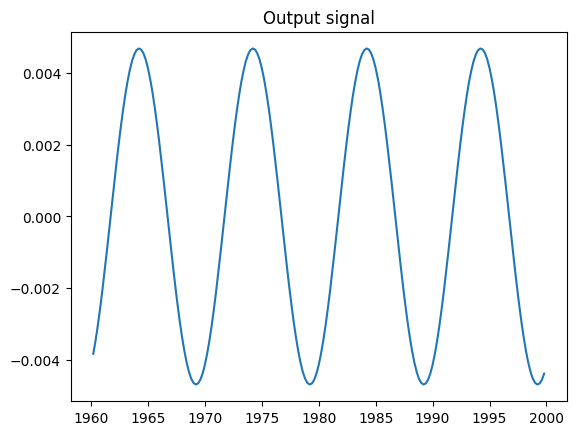

Input amlplitude: 0.01;	output amplitude: 0.00467981057032547
oriental point: 1980.2	-0.0038270141346600116


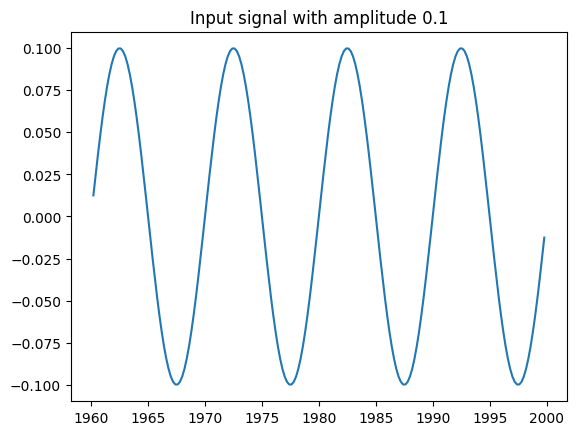

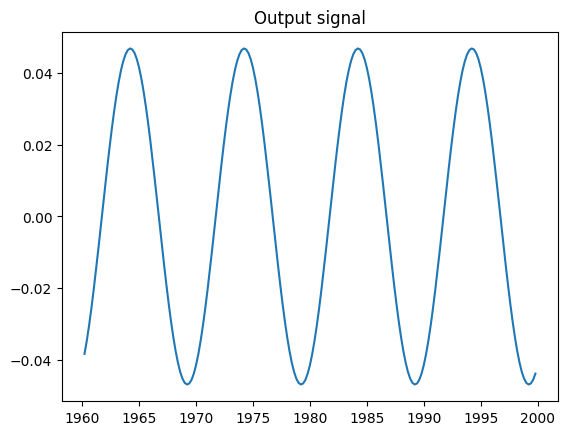

Input amlplitude: 0.1;	output amplitude: 0.046798105703254725
oriental point: 1980.2	-0.03827014134660012


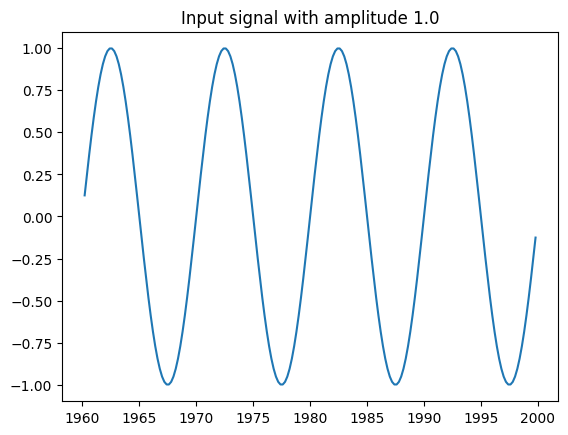

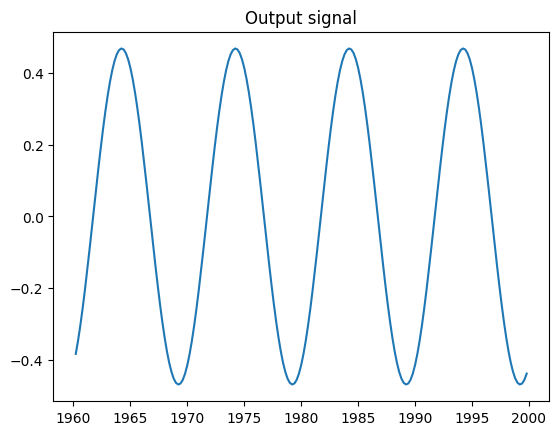

Input amlplitude: 1.0;	output amplitude: 0.46798105703254705
oriental point: 1980.2	-0.38270141346600106


In [4]:
for amp in Amps:
    S = [amp * math.sin(t*2*math.pi*freq) for t in T]
    Tout, yout, xout = signal.lsim(model, S, T)
    plt.figure()
    plt.plot(T[-200:-1], S[-200:-1])
    plt.title("Input signal with amplitude {}".format(amp))
    plt.figure()
    plt.plot(Tout[-200:-1], yout[-200:-1])
    plt.title("Output signal")
    plt.show()
    print("Input amlplitude: {};\toutput amplitude: {}".format(amp, (max(yout[-200:-1])-min(yout[-200:-1]))/2))
    print("oriental point: {}\t{}".format(Tout[-100], yout[-100]))

In [5]:
Frs = [0.001, 0.01, 0.1, 1.0]
Amps = [1, 1, 1, 1]

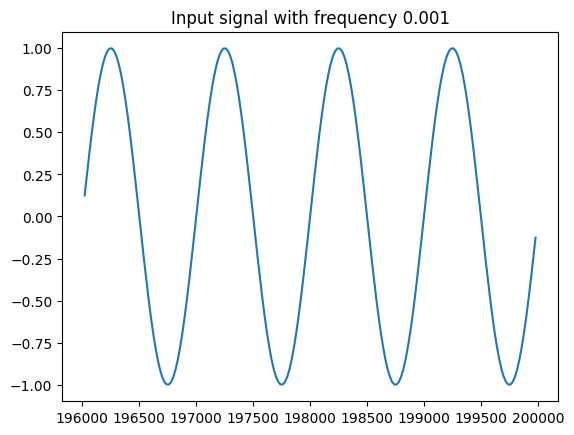

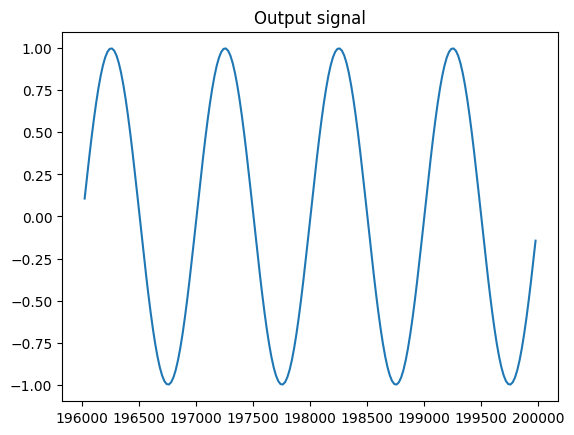

Input frequency: 0.001;	output amplitude: 0.9980237200714908
oriental point: 198020.0	0.10653324901103692


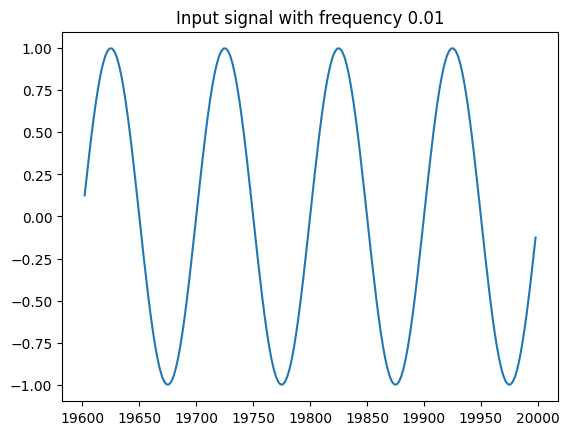

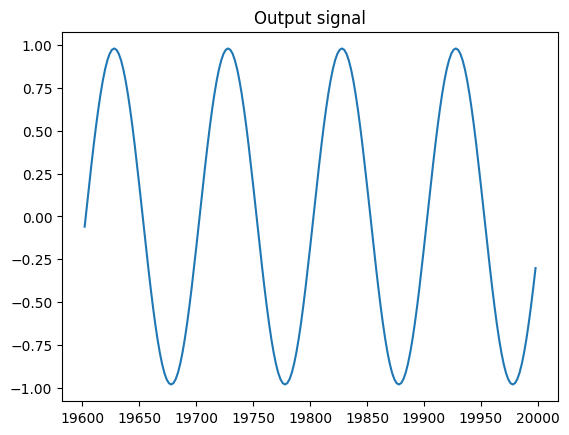

Input frequency: 0.01;	output amplitude: 0.9814081696424002
oriental point: 19802.0	-0.05947486685256452


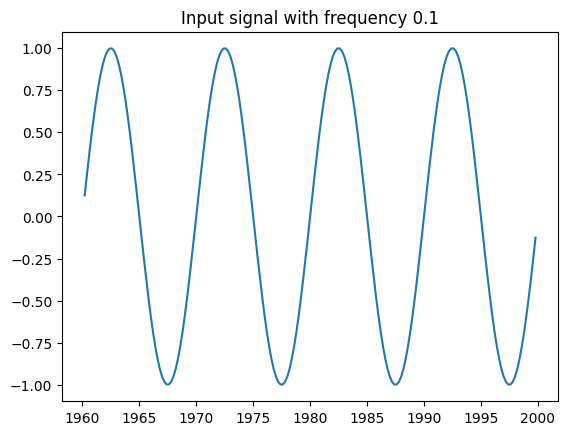

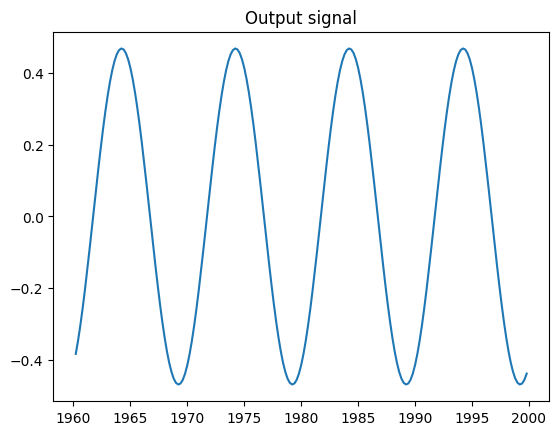

Input frequency: 0.1;	output amplitude: 0.46798105703254705
oriental point: 1980.2	-0.38270141346600106


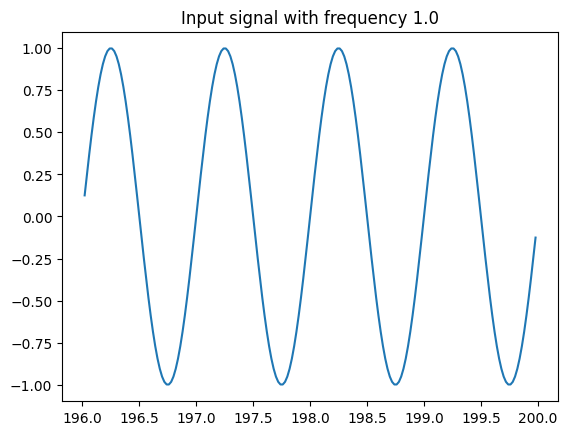

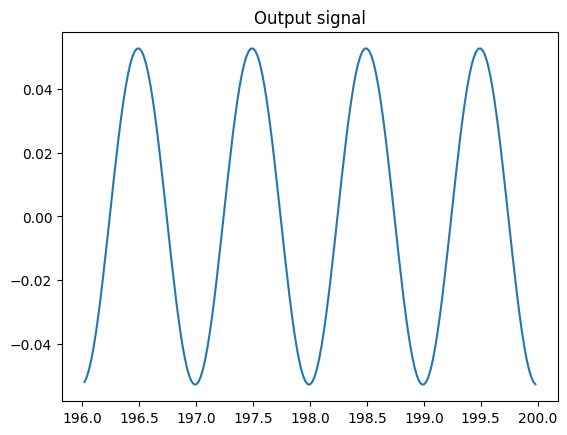

Input frequency: 1.0;	output amplitude: 0.052833118377587
oriental point: 198.02	-0.052065218456844045


In [6]:
for i in range(0, 4):
    T = np.linspace(0, 200.0/Frs[i], 10001)
    S = [math.sin(t*2*math.pi*Frs[i]) for t in T]
    Tout, yout, xout = signal.lsim(model, S, T)
    
    plt.figure()
    plt.plot(T[-200:-1], S[-200:-1])
    plt.title("Input signal with frequency {}".format(Frs[i]))
    plt.figure()
    plt.plot(Tout[-200:-1], yout[-200:-1])
    plt.title("Output signal")
    plt.show()
    
    Amps[i] = (max(yout[-200:-1])-min(yout[-200:-1]))/2
    print("Input frequency: {};\toutput amplitude: {}".format(Frs[i], Amps[i]))
    print("oriental point: {}\t{}".format(Tout[-100], yout[-100]))


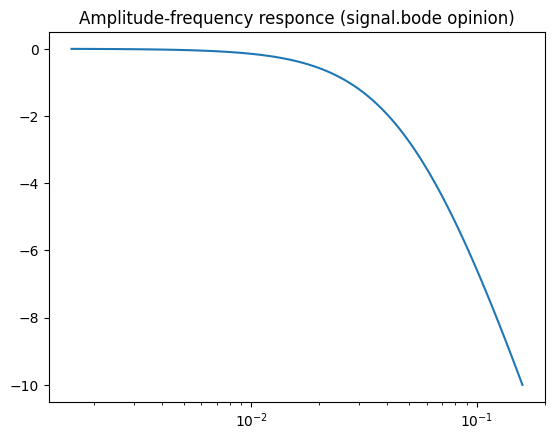

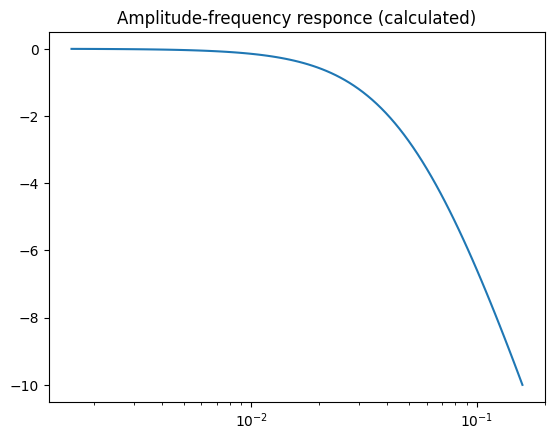

In [7]:
Omegas, A, Phi = signal.bode(model) # returns magnitude and phase arrays for a "reasonable" set of frequencies chosen by function
fs = [0.5*w/math.pi for w in Omegas] 

A_calc = [20*math.log10(1 / (math.sqrt(1+a*a*w*w))) for w in Omegas]
plt.figure()
plt.semilogx(fs, A)
plt.title("Amplitude-frequency responce (signal.bode opinion)")
plt.figure()
plt.semilogx(fs, A_calc)
plt.title("Amplitude-frequency responce (calculated)")
plt.show()

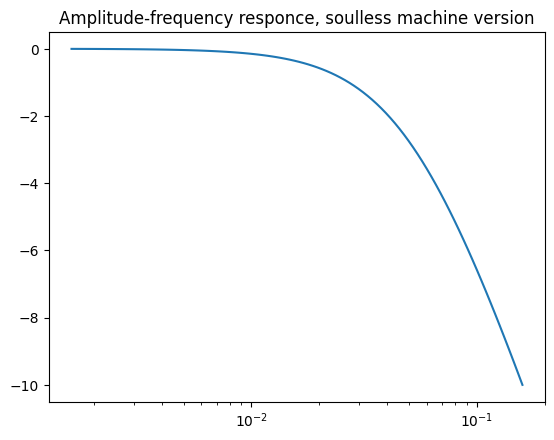

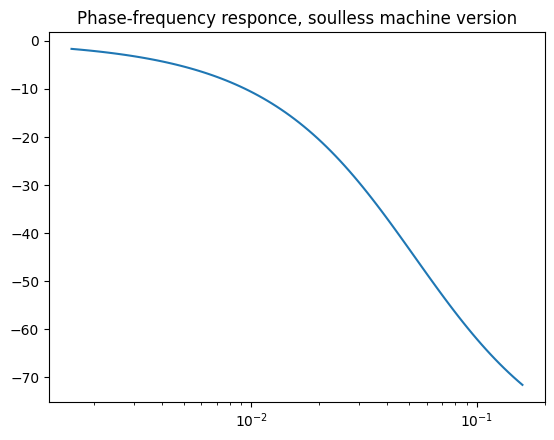

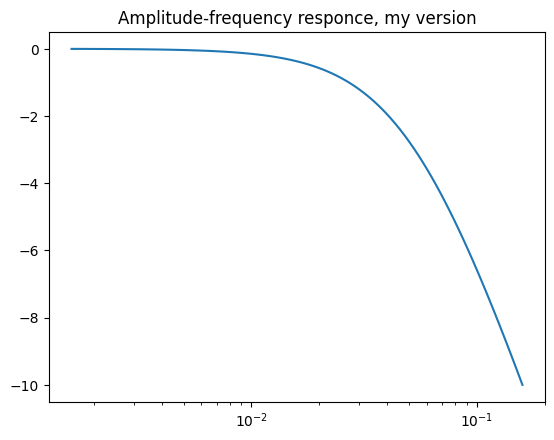

In [8]:
Omegas, mag, phase = signal.bode(model)
fs = [0.5*w/math.pi for w in Omegas]
A_calc =[20*math.log10(1 / (math.sqrt((1+a*a*w*w)))) for w in Omegas]

#plt.figure()
#plt.semilogx(fs, Phi)
#plt.title("Phase-frequency responce (signal.bode opinion)")
#plt.figure()
#plt.semilogx(fs, Phi_calc)
#plt.title("Phase-frequency responce (calculated)")
#plt.show()
plt.figure()
plt.semilogx(fs, mag) 
plt.title("Amplitude-frequency responce, soulless machine version")# Bode magnitude plot
plt.figure()
plt.semilogx(fs, phase)
plt.title("Phase-frequency responce, soulless machine version")# Bode phase plot
plt.show()
plt.semilogx(fs, A_calc)
plt.title("Amplitude-frequency responce, my version")
plt.show()

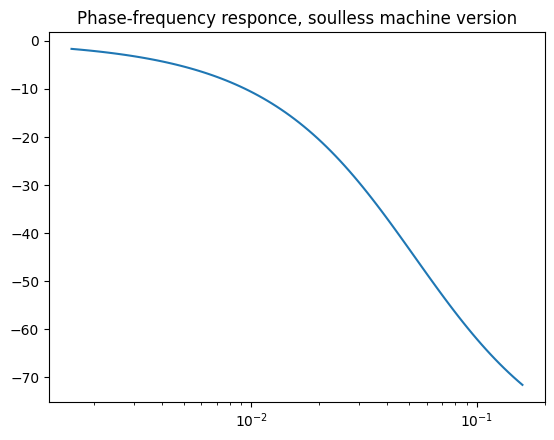

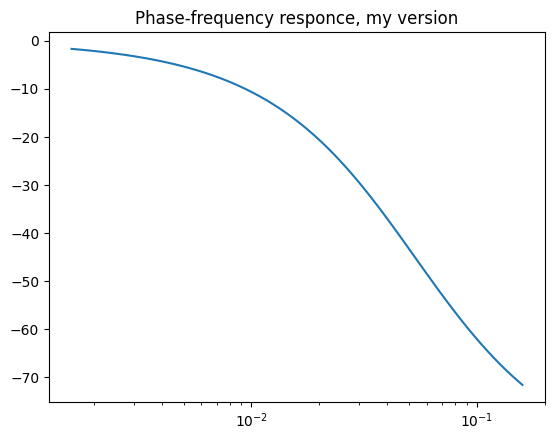

In [9]:
from sympy import arg, I
Phi_calc = [180/math.pi* arg(1/ 1-I*a*w) for w in Omegas]
plt.figure()
plt.semilogx(fs, phase)
plt.title("Phase-frequency responce, soulless machine version")
plt.figure()
plt.semilogx(fs, Phi_calc)
plt.title("Phase-frequency responce, my version")
plt.show()

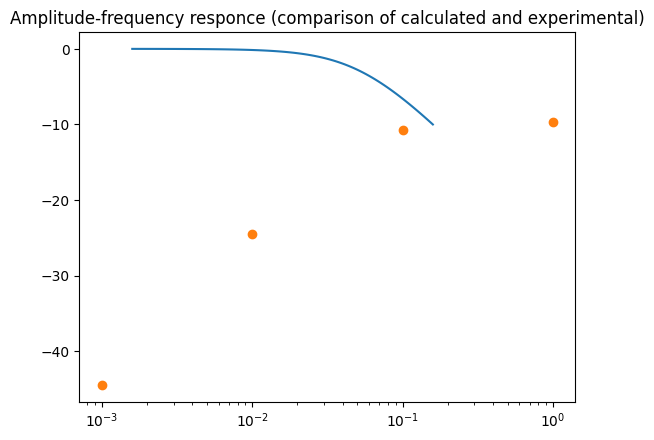

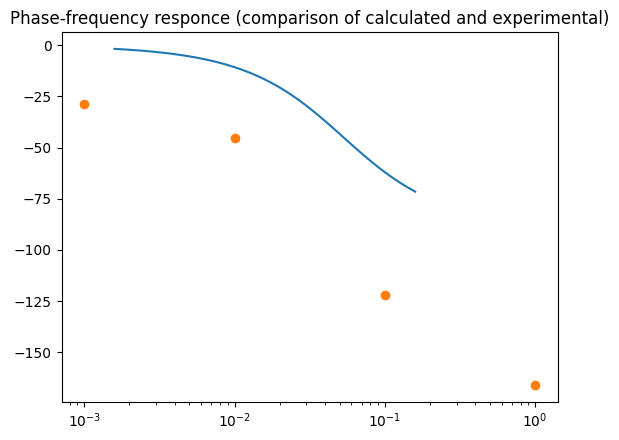

In [10]:
Frs = [0.001, 0.01, 0.1, 1.0] 
Phases = [-0.5, -0.79, -2.13, -2.9]
Amps = [0.006, 0.06, 0.29, 0.33]
plt.figure()
plt.semilogx(fs, A_calc)
plt.semilogx(Frs, [(20*math.log10(am)) for am in Amps], 'o')
plt.title("Amplitude-frequency responce (comparison of calculated and experimental)")
plt.figure()
plt.semilogx(fs, Phi_calc)
plt.semilogx(Frs, [(180*ph / math.pi) for ph in Phases], 'o')
plt.title("Phase-frequency responce (comparison of calculated and experimental)")
plt.show()

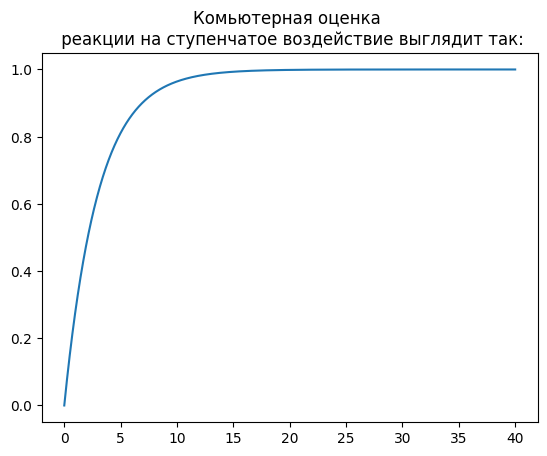

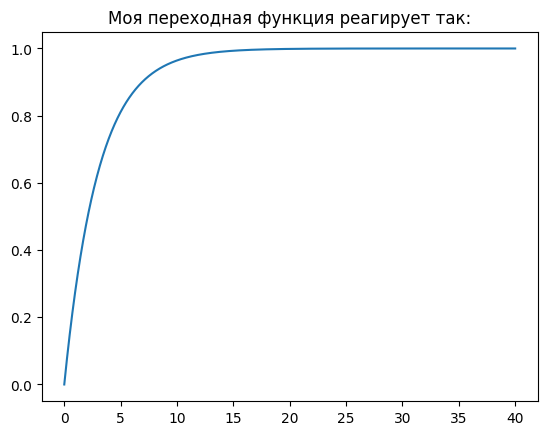

In [13]:
S = [1 for t in T[:2001]]
H = list((1 - 1 * math.exp((-1/3)*t) for t in T[:2001]))
Tout, yout, xout = signal.lsim(model, S, T[:2001])
plt.figure()
plt.plot(Tout[:2001], yout[:2001])
plt.title("Комьютерная оценка \n реакции на ступенчатое воздействие выглядит так:")
plt.figure()
plt.plot(T[:2001], H)
plt.title("Моя переходная функция реагирует так:")
plt.show()
